In [10]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2704 - accuracy: 0.9220
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1101 - accuracy: 0.9662
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0751 - accuracy: 0.9761


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9716
0.09338603168725967 0.9715999960899353


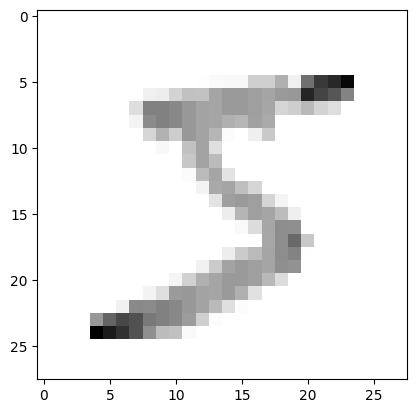

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [12]:
import os
model.save(os.path.join('k1-data', 'epic_num_reader.model'))

INFO:tensorflow:Assets written to: k1-data\epic_num_reader.model\assets


In [13]:
new_model = tf.keras.models.load_model(os.path.join('k1-data', 'epic_num_reader.model'))

In [14]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 0s 943us/step
[[3.99487214e-12 5.17327052e-08 9.22429138e-07 ... 9.99975443e-01
  3.86473253e-08 1.51849946e-08]
 [1.70525971e-09 7.42542848e-04 9.99248803e-01 ... 6.96486757e-10
  1.24734783e-08 1.86306855e-11]
 [3.44363715e-09 9.99895692e-01 1.56324822e-05 ... 4.49869367e-05
  2.51748079e-05 8.69976589e-08]
 ...
 [1.70555092e-09 4.40059193e-06 2.79371903e-07 ... 1.19958924e-04
  1.50660765e-06 1.14753835e-04]
 [1.52629696e-06 4.24290675e-07 2.11572928e-08 ... 1.88836736e-07
  3.62657156e-04 1.13603640e-07]
 [3.36887570e-05 7.75302524e-08 1.17974899e-07 ... 6.97147051e-09
  5.66639535e-08 1.03453118e-07]]


7 8


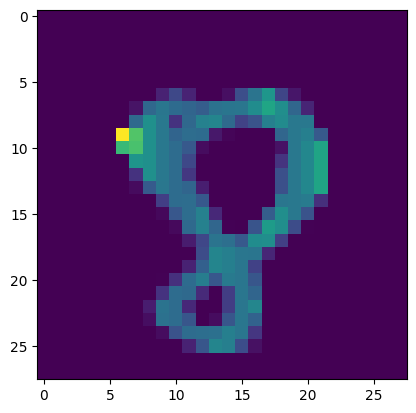

In [140]:
import numpy as np
import random

while True:
    sample_image = random.randrange(0, 10000)
    if np.argmax(predictions[sample_image]) != y_test[sample_image]:
        print(np.argmax(predictions[sample_image]), y_test[sample_image])
        plt.imshow(x_test[sample_image])
        plt.show()
        break